# Image Interpolation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from nearest_11910206 import nearest_11910206
from bilinear_11910206 import bilinear_11910206
from bicubic_11910206 import bicubic_11910206

%matplotlib inline

np.random.seed(0)  # repeatable
test = np.uint8(np.random.randint(0, 255, size=(5, 7)))
test_3 = np.uint8(np.random.randint(0, 255, size=(5, 5, 3)))
raw_gray = cv2.cvtColor(cv2.imread('rice.tif'), cv2.COLOR_BGR2GRAY)

## Figure to test

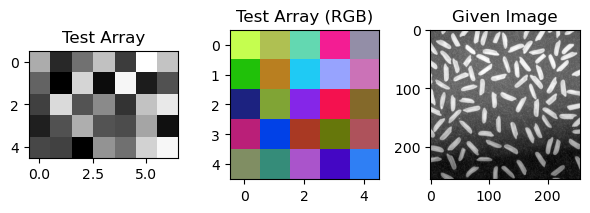

In [2]:
plt.figure(dpi=100)

plt.subplot(131)
plt.title("Test Array")
plt.imshow(test, cmap='gray')

plt.subplot(132)
plt.title("Test Array (RGB)")
plt.imshow(test_3)

plt.subplot(133)
plt.title("Given Image")
plt.imshow(raw_gray, cmap='gray')

plt.tight_layout()
plt.show()

## Results

### Given Figures

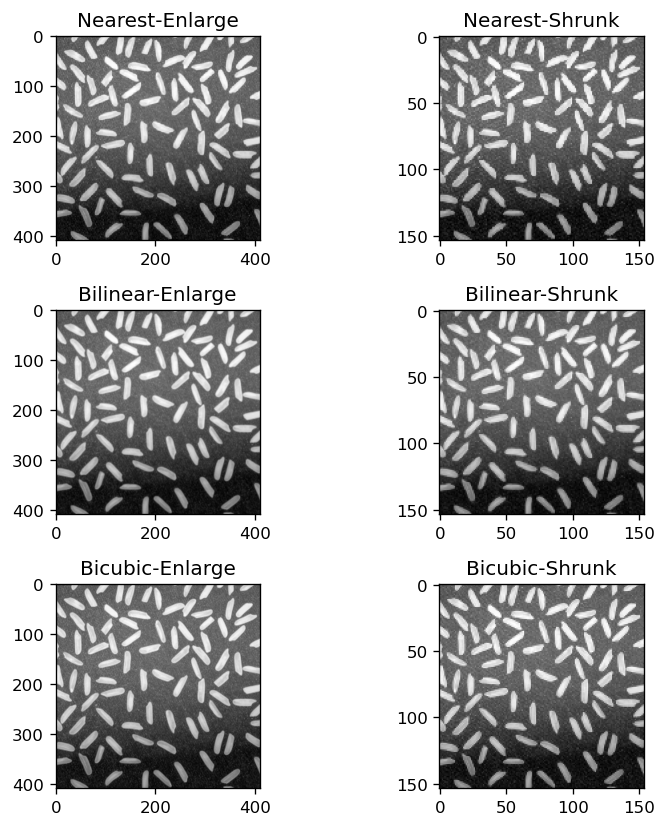

In [3]:
plt.figure(figsize=(7, 7), dpi=120)

plt.subplot(321)
plt.title("Nearest-Enlarge")
resized = nearest_11910206('rice.tif', [410, 410])
plt.imshow(resized, cmap='gray')
cv2.imwrite('./enlarged_nearest_11910206.tif', resized)

plt.subplot(322)
plt.title("Nearest-Shrunk")
resized = nearest_11910206('rice.tif', [154, 154])
plt.imshow(resized, cmap='gray')
cv2.imwrite('./shrunk_nearest_11910206.tif', resized)

plt.subplot(323)
plt.title("Bilinear-Enlarge")
resized = bilinear_11910206('rice.tif', [410, 410])
plt.imshow(resized, cmap='gray')
cv2.imwrite('./enlarged_bilinear_11910206.tif', resized)

plt.subplot(324)
plt.title("Bilinear-Shrunk")
resized = bilinear_11910206('rice.tif', [154, 154])
plt.imshow(resized, cmap='gray')
cv2.imwrite('./shrunk_bilinear_11910206.tif', resized)

plt.subplot(325)
plt.title("Bicubic-Enlarge")
resized = bicubic_11910206('rice.tif', [410, 410])
plt.imshow(resized, cmap='gray')
cv2.imwrite('./enlarged_bicubic_11910206.tif', resized)

plt.subplot(326)
plt.title("Bicubic-Shrunk")
resized = bicubic_11910206('rice.tif', [154, 154])
plt.imshow(resized, cmap='gray')
cv2.imwrite('./shrunk_bicubic_11910206.tif', resized)

plt.tight_layout()
plt.show()

### Nearest Neighbor Interpolation

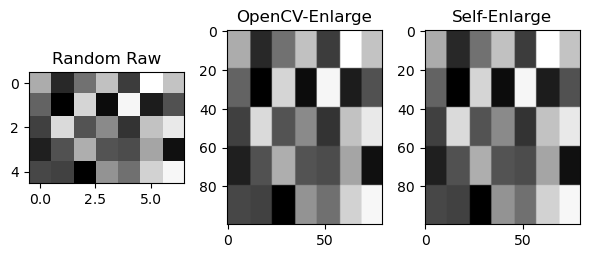

In [4]:
# TODO: this cell may be deleted

plt.figure(dpi=100)

plt.subplot(131)
plt.title("Random Raw")
plt.imshow(test, cmap='gray')

plt.subplot(132)
plt.title("OpenCV-Enlarge")
resized = cv2.resize(test, (80, 100), interpolation=cv2.INTER_NEAREST)
plt.imshow(resized, cmap='gray')

plt.subplot(133)
plt.title("Self-Enlarge")
resized = nearest_11910206(test, [100, 80], raw=True)
plt.imshow(resized, cmap='gray')

plt.tight_layout()
plt.show()

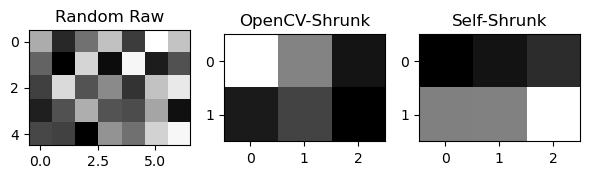

In [5]:
# TODO: this cell may be deleted

plt.figure(dpi=100)

plt.subplot(131)
plt.title("Random Raw")
plt.imshow(test, cmap='gray')

plt.subplot(132)
plt.title("OpenCV-Shrunk")
resized_1 = cv2.resize(test, (3, 2), interpolation=cv2.INTER_NEAREST)
plt.imshow(resized_1, cmap='gray')

plt.subplot(133)
plt.title("Self-Shrunk")
resized_2 = nearest_11910206(test, [2, 3], raw=True)
plt.imshow(resized_2, cmap='gray')

plt.tight_layout()
plt.show()

In [6]:
# print('Raw:\n', test)
# print('OpenCV:\n', resized_1)
# print('Mine:\n', resized_2)

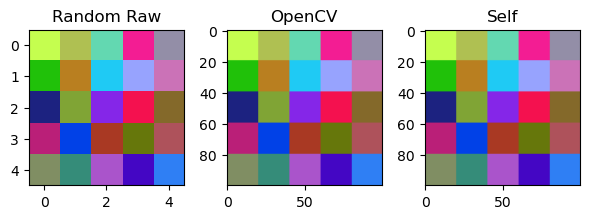

In [7]:
# TODO: this cell may be deleted

plt.figure(dpi=100)

plt.subplot(131)
plt.title("Random Raw")
plt.imshow(test_3)

plt.subplot(132)
plt.title("OpenCV")
resized = cv2.resize(test_3, (100, 100), interpolation=cv2.INTER_NEAREST)
plt.imshow(resized)

plt.subplot(133)
plt.title("Self")
resized = nearest_11910206(test_3, [100, 100], raw=True)
plt.imshow(resized)

plt.tight_layout()
plt.show()

### Bilinear Neighbor Interpolation

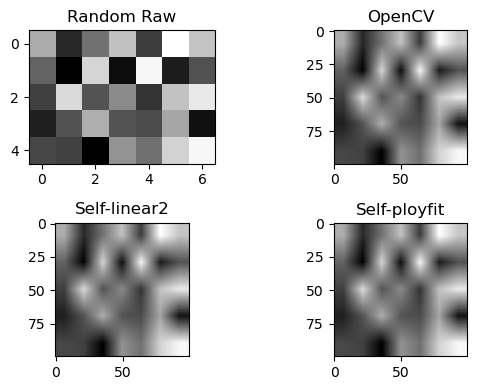

In [8]:
# TODO: this cell may be deleted

plt.figure(dpi=100)

plt.subplot(221)
plt.title("Random Raw")
plt.imshow(test, cmap='gray')

plt.subplot(222)
plt.title("OpenCV")
resized = cv2.resize(test, (100, 100), interpolation=cv2.INTER_LINEAR)
plt.imshow(resized, cmap='gray')

plt.subplot(223)
plt.title("Self-linear2")
resized = bilinear_11910206(test, [100, 100], raw=True)
plt.imshow(resized, cmap='gray')

plt.subplot(224)
plt.title("Self-ployfit")
resized = bilinear_11910206(test, [100, 100], raw=True, method='polyfit')
plt.imshow(resized, cmap='gray')

plt.tight_layout()
plt.show()

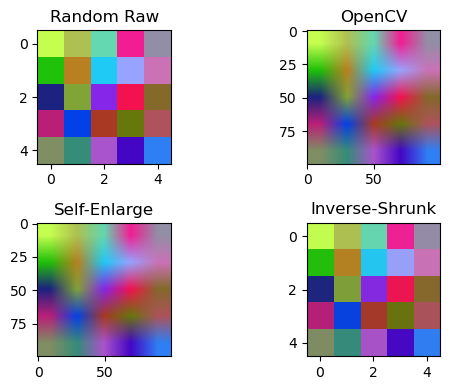

In [9]:
plt.figure(dpi=100)

plt.subplot(221)
plt.title("Random Raw")
plt.imshow(test_3)

plt.subplot(222)
plt.title("OpenCV")
resized = cv2.resize(test_3, (100, 100), interpolation=cv2.INTER_LINEAR)
plt.imshow(resized)

plt.subplot(223)
plt.title("Self-Enlarge")
resized = bilinear_11910206(test_3, [100, 100], raw=True)
plt.imshow(resized)

plt.subplot(224)
plt.title("Inverse-Shrunk")
resized = bilinear_11910206(resized, [5, 5], raw=True)
plt.imshow(resized)

plt.tight_layout()
plt.show()

## Time Complexity Analysis

### Enlarge

In [11]:
import time

sample_indices = np.linspace(256, 800, 15, dtype=int)
sample_indices_2 = np.linspace(256, 3000, 50, dtype=int)
nearest_time = []
bilinear_time = []
bilinear_poly_time = []
nearest_opencv_time = []
bilinear_opencv_time = []
bicubic_opencv_time = []
T1, T2 = 0, 0
for si in sample_indices: # sample_indices_2

    T1 = time.time()
    nearest_11910206(raw_gray, [si, si], raw=True)
    T2 = time.time()
    nearest_time.append(T2 - T1)

    T1 = time.time()
    bilinear_11910206(raw_gray, [si, si], raw=True)
    T2 = time.time()
    bilinear_time.append(T2 - T1)

    T1 = time.time()
    bilinear_11910206(raw_gray, [si, si], raw=True, method='polyfit')
    T2 = time.time()
    bilinear_poly_time.append(T2 - T1)

    T1 = time.time()
    cv2.resize(raw_gray, [si, si], interpolation=cv2.INTER_NEAREST)
    T2 = time.time()
    nearest_opencv_time.append(T2 - T1)

    T1 = time.time()
    cv2.resize(raw_gray, [si, si], interpolation=cv2.INTER_LINEAR)
    T2 = time.time()
    bilinear_opencv_time.append(T2 - T1)

    T1 = time.time()
    cv2.resize(raw_gray, [si, si], interpolation=cv2.INTER_CUBIC)
    T2 = time.time()
    bicubic_opencv_time.append(T2 - T1)

In [ ]:
plt.figure(dpi=100)

plt.subplot(121)

plt.plot(sample_indices, np.array(nearest_time), label='nearest')
plt.plot(sample_indices, np.array(bilinear_time), label='bilinear_linear2')
plt.plot(sample_indices, np.array(bilinear_poly_time), label='bilinear_polyfit')
plt.xlabel('sample indices')
plt.ylabel('time / s')
plt.title('self-implemented test')
plt.legend()

plt.subplot(122)

plt.plot(sample_indices, np.array(nearest_opencv_time), label='nearest_cv2')
plt.plot(sample_indices, np.array(bilinear_opencv_time), label='bilinear_cv2')
plt.plot(sample_indices, np.array(bicubic_opencv_time), label='bicubic_cv2')
plt.xlabel('sample indices')
plt.ylabel('time / s')
plt.title('OpenCV test')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
sample_indices = np.linspace(10, 256, 20, dtype=int)
sample_indices_2 = np.linspace(256, 3000, 50, dtype=int)
nearest_time = []
bilinear_time = []
bilinear_poly_time = []
nearest_opencv_time = []
bilinear_opencv_time = []
bicubic_opencv_time = []
T1, T2 = 0, 0
for si in sample_indices: # sample_indices_2

    T1 = time.time()
    nearest_11910206(raw_gray, [si, si], raw=True)
    T2 = time.time()
    nearest_time.append(T2 - T1)

    T1 = time.time()
    bilinear_11910206(raw_gray, [si, si], raw=True)
    T2 = time.time()
    bilinear_time.append(T2 - T1)

    T1 = time.time()
    bilinear_11910206(raw_gray, [si, si], raw=True, method='polyfit')
    T2 = time.time()
    bilinear_poly_time.append(T2 - T1)

    T1 = time.time()
    cv2.resize(raw_gray, [si, si], interpolation=cv2.INTER_NEAREST)
    T2 = time.time()
    nearest_opencv_time.append(T2 - T1)

    T1 = time.time()
    cv2.resize(raw_gray, [si, si], interpolation=cv2.INTER_LINEAR)
    T2 = time.time()
    bilinear_opencv_time.append(T2 - T1)

    T1 = time.time()
    cv2.resize(raw_gray, [si, si], interpolation=cv2.INTER_CUBIC)
    T2 = time.time()
    bicubic_opencv_time.append(T2 - T1)

In [ ]:
plt.figure(dpi=100)

plt.subplot(121)

plt.plot(sample_indices, np.array(nearest_time), label='nearest')
plt.plot(sample_indices, np.array(bilinear_time), label='bilinear_linear2')
plt.plot(sample_indices, np.array(bilinear_poly_time), label='bilinear_polyfit')
plt.xlabel('sample indices')
plt.ylabel('time / s')
plt.title('self-implemented test')
plt.legend()

plt.subplot(122)

plt.plot(sample_indices, np.array(nearest_opencv_time), label='nearest_cv2')
plt.plot(sample_indices, np.array(bilinear_opencv_time), label='bilinear_cv2')
plt.plot(sample_indices, np.array(bicubic_opencv_time), label='bicubic_cv2')
plt.xlabel('sample indices')
plt.ylabel('time / s')
plt.title('OpenCV test')
plt.legend()

plt.tight_layout()
plt.show()